## Práctica 4. Introducción a la visualizaciones de redes de vínculos en R

1.   Gerardo Armando Guerrero Álvarez - 203214
2.   Santiago Villaseñor - 201427
3. José Sebastián Córdoba Quintana - 201739


## Introducción

En la práctica anterior vimos cómo visualizar grafos y analizar redes.  En esta ocasión aprenderemos a utilizar algunas librerías de R que se integran a ggplot. También aprenderemos a desplegar redes jerárquicas en R.



### Entregables

La práctica se hace por equipos. Se entrega un documento con:

* Todas las preguntas solicitadas en este documento;

* Todas las capturas de grafos solicitadas;

* El código de los scripts generados

  

## I. Visualización de grafos con Ggraph

ggraph es una extensión de `ggplot2` para graficar estructuras de datos relacionales tales como redes, grafos y árboles. Si bien sigue las ideas de base de `ggplot2` y su API, integra su propio conjunto de geoms, facets, etc. y añade el concepto de *planos o diseños* (*layouts*) a la gramática de `ggplot2`.

Utiliza varias de las funciones de `igraph`, un poderoso paquete de R para análisis de grafos. Proporciona una amplia gama de herramientas para la manipulación y el  análisis de datos de redes, como cálculos de centralidad, detección de  comunidades, búsqueda de caminos más cortos, entre otros.



#### 1. Preparación de datos

1. Como en la práctica anterior, abra un nuevo proyecto en Gephi y abra el archivo `LadaFacebookAnon.gdf`.
2. Desde el Laboratorio de datos, exporte la tabla de Nodos como un archivo csv con el nombre `NodosLadaFB.csv` y la tabla de Aristas en un archivo con el nombre `OrillasLadaFB.csv`. **Debe seleccionar la tabla correspondiente en el menú de opciones**.



#### 2. Carga y visualización de las orillas

1. Abra RStudio y asegúrese que los archivos que descargó en el punto anterior, están en el directorio activo de RStudio.
2. Lea el archivo `OrillasLadaFB.csv`  y guárdelo en un dataframe `orillas`.  De una vez cargue las librerías que necesitará más adelante:


In [2]:
#get the working directory of R


In [3]:
install.packages('igraph',dependencies = TRUE)
install.packages('ggraph',dependencies = TRUE)

Warning message:
"dependency 'graph' is not available"



  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  2.0.2  2.0.3              TRUE



installing the source package 'igraph'


Warning message in install.packages("igraph", dependencies = TRUE):
"installation of package 'igraph' had non-zero exit status"



The downloaded binary packages are in
	/var/folders/hx/2yrhw82s29g3zhsqchyrqcy80000gn/T//Rtmp3uIehM/downloaded_packages


In [6]:
library(ggplot2)
library(ggraph)
library(igraph)
orillas <- read.csv("OrillasLadaFB.csv",header=T)

Creamos un objeto grafo a partir del dataframe  y lo graficamos con los valores por omisión:

Using "sugiyama" as default layout


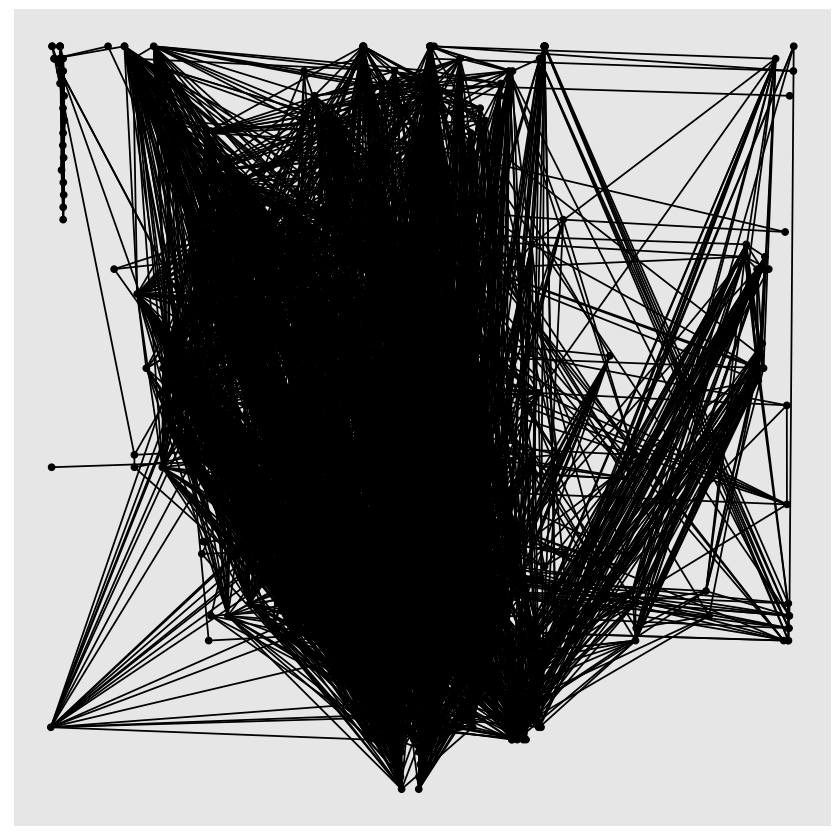

In [7]:
g <- graph_from_data_frame(orillas)

ggraph(g) + geom_node_point() +
  geom_edge_link()

![](https://drive.google.com/uc?export=view&id=1dlWTuvaS8y9MQDDJAxscdEoY-488103-)

La gráfica resultante, como las primeras en Gephi, es bastante inútil, excepto quizás que en esta ocasión vemos con más claridad los nodos que están más alejados y relativamente aislados.



---

**PREGUNTA 1.** ¿Por qué se despliegan nodos si estamos trabajando con un archivo de aristas?

Porque el archivo de aristas tiene información de los nodos al tener las columnas `"source"` y `"target"`

---





ggraph tiene una gran cantidad de opciones para desplegar los grafos. Una, basada en algoritmos de fuerza dirigida, es `kk`.  Vamos a utilizarlo y además cambiemos el color de los nodos y de las aristas:

In [8]:
ggraph(g, layout='kk') + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue')



---

**PREGUNTA 2.** Muestre la gráfica resultante


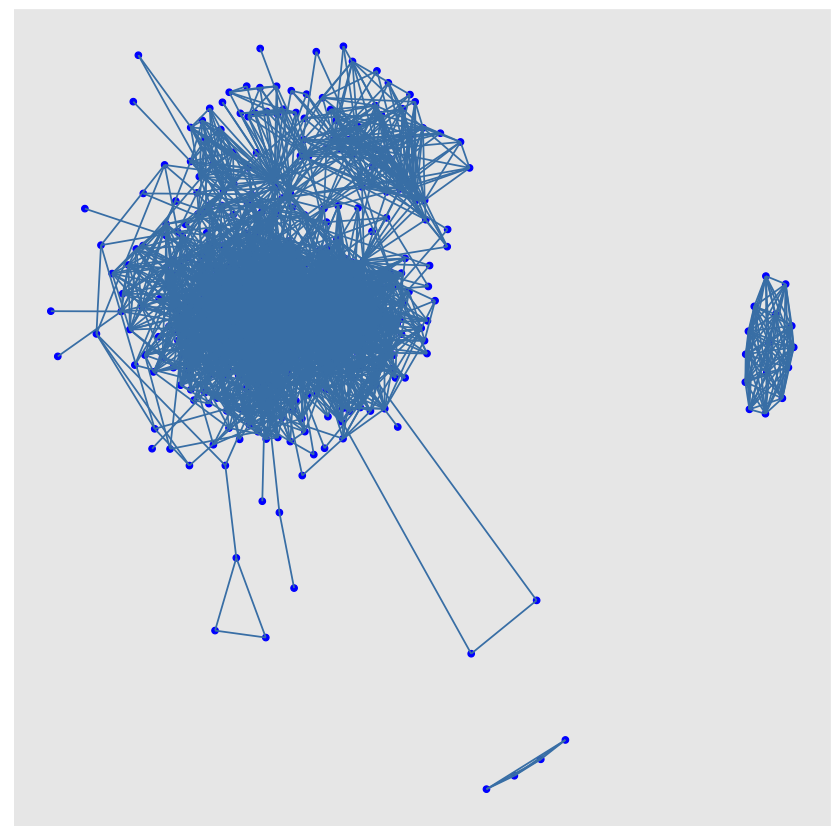

In [9]:
ggraph(g, layout='kk') + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue')


---



Para la mayoría de los planos se pueden especificar opciones. Veamos un ejemplo:

In [ ]:
ggraph(g, layout='kk',maxiter=100) + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue')



---

**PREGUNTA 3**. Muestre la gráfica resultante


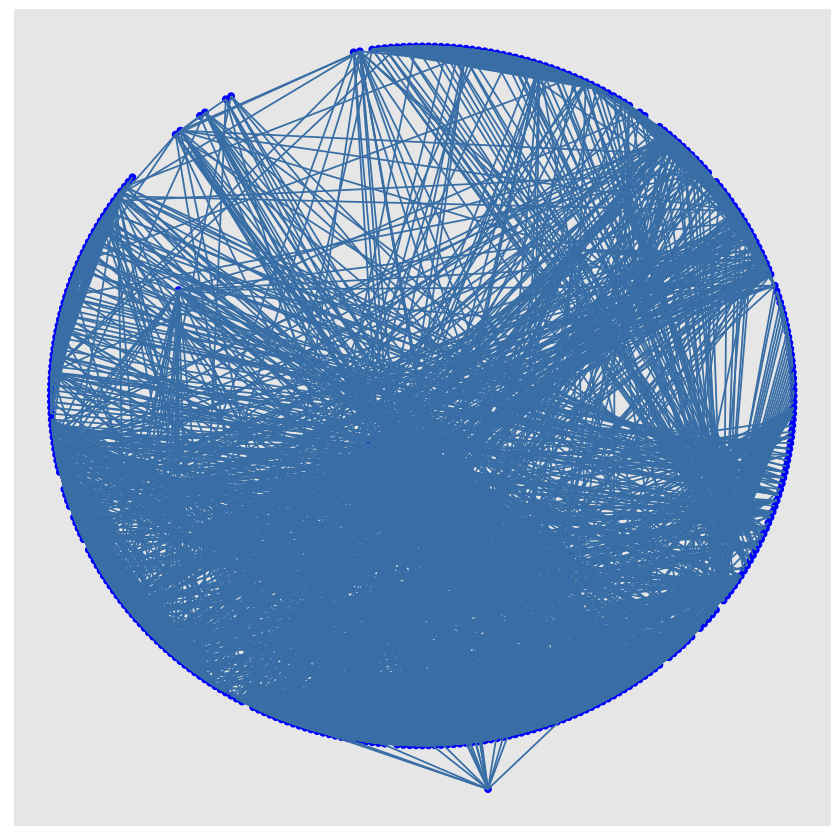

In [10]:
ggraph(g, layout='kk',maxiter=100) + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue')


---



---

**PREGUNTA 4**. Cambie maxiter a 750 y muestre la gráfica resultante
º

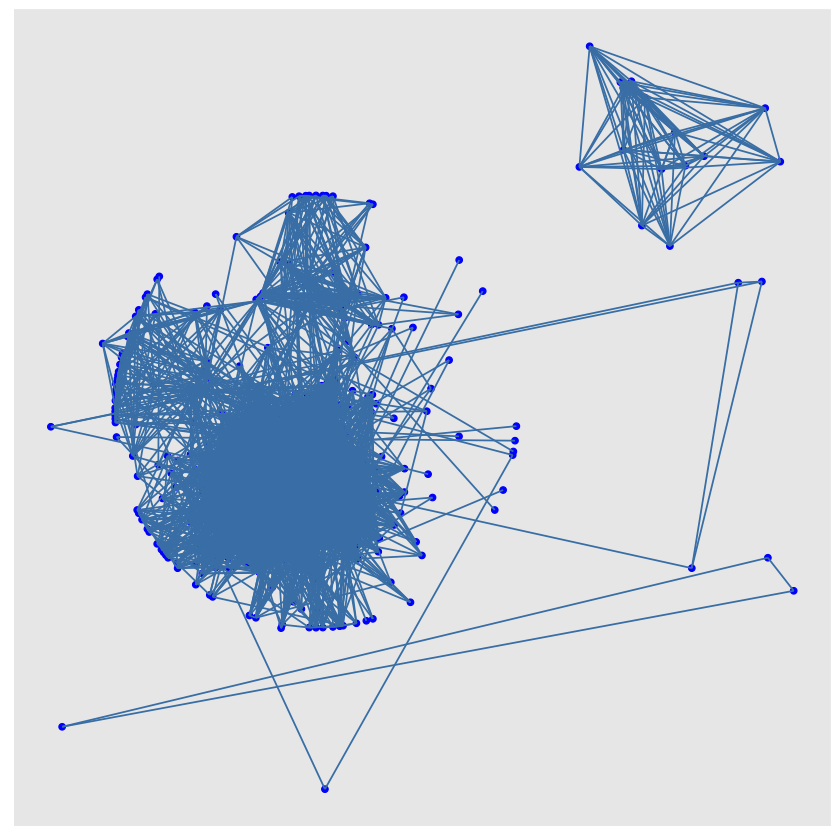

In [11]:
ggraph(g, layout='kk',maxiter=750) + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue')


---



El archivo de aristas no tiene mucha información de valor. Carguemos también el archivo de nodos y creemos un grafo a partir de los dos.  Ahora podemos asignar un canal visual a una variable categórica, por ejemplo, distinguir el género en función de la tonalidad:

In [ ]:
nodos <- read.csv("NodosLadaFB.csv",header=T)
g <- graph_from_data_frame(d=orillas,v=nodos)

ggraph(g,layout='kk') + geom_node_point(aes(color=sex),size=3) +
  geom_edge_link(width = .2, color = 'steelblue')




---

**PREGUNTA 5.** Muestre la gráfica resultante


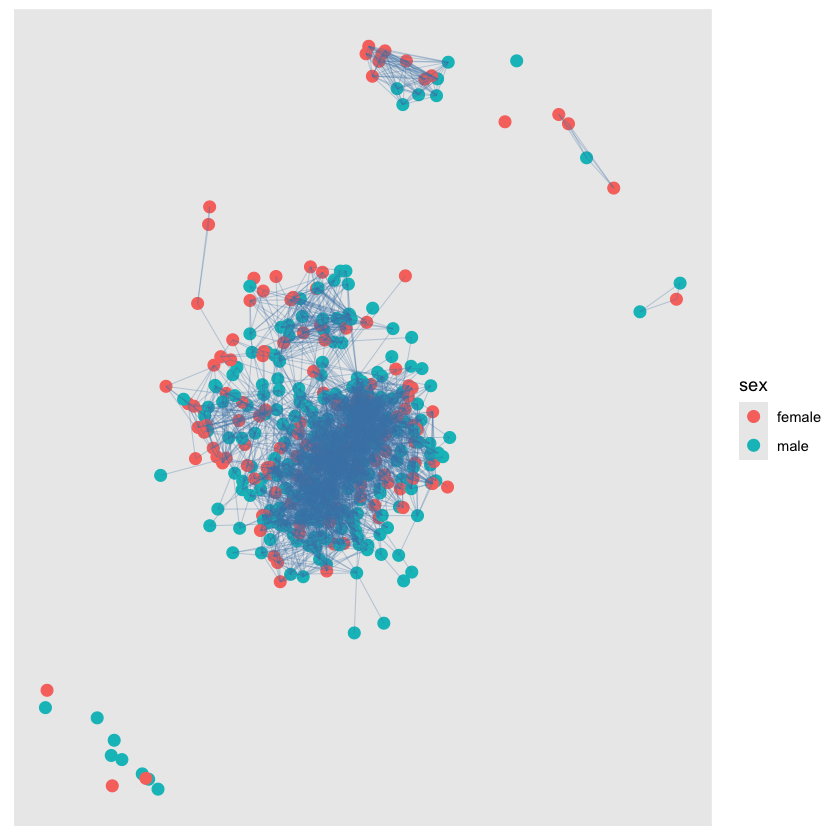

In [12]:
nodos <- read.csv("NodosLadaFB.csv",header=T)
g <- graph_from_data_frame(d=orillas,v=nodos)

ggraph(g,layout='kk') + geom_node_point(aes(color=sex),size=3) +
  geom_edge_link(width = .3, color = 'steelblue',alpha = 0.3)



---

**PREGUNTA 6.** Ahora distinga por el origen de la relación con el canal visual de tonalidad y el género por el tamaño del punto.  Para que las líneas no obstruyan a los nodos, grafique primero las líneas. Muestre la gráfica resultante.


Warning message:
"Using size for a discrete variable is not advised."


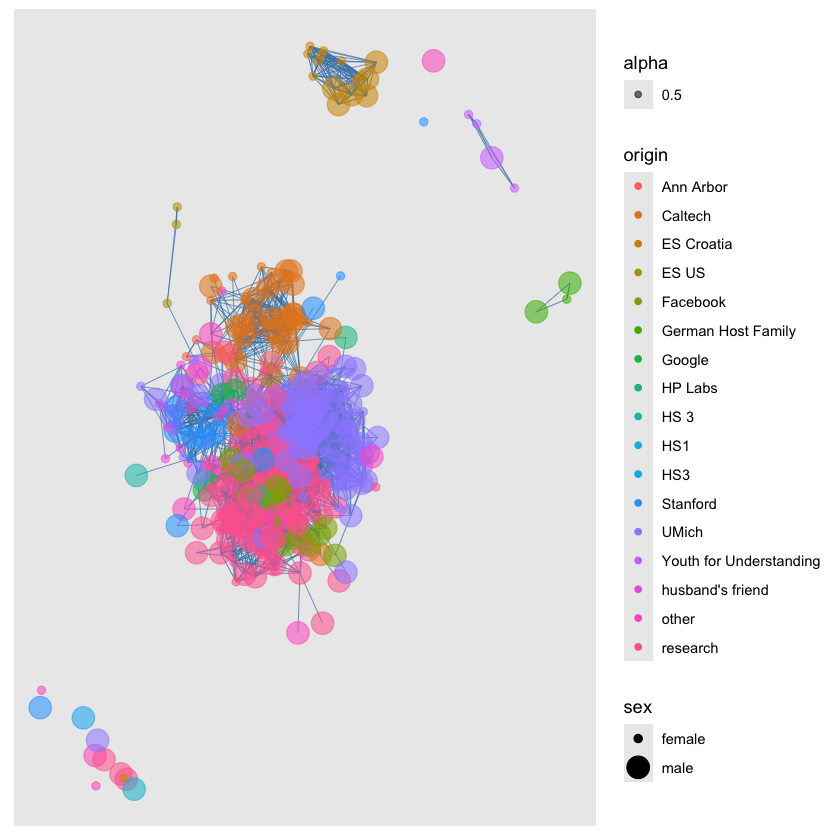

In [14]:
ggraph(g, layout = 'kk') +
  geom_edge_link(color = 'steelblue', width = 0.2) +
  geom_node_point(aes(size = sex, color = origin,alpha = 0.5))


---



#### 3. Cálculo de estadísticas

Vamos a utilizar algunas de las funciones de igraph para calcular estadísticas sobre nuestro grafo. Empecemos por calcular el grado de los nodos y asignarlo como un nuevo atributo:

In [15]:
V(g)$grado=degree(g)
summary(g)

IGRAPH 6d7cb44 DN-- 388 3598 -- 
+ attr: name (v/c), Label (v/c), sex (v/c), agerank (v/n), wallcount
| (v/n), locale (v/c), modularityclass (v/n), origin (v/c), grado
| (v/n), Type (e/c), Id (e/n), Label (e/l), Weight (e/n)


**PREGUNTA 7.** Interprete el resultado del último comando y verifique que, en efecto, se tiene un nuevo atributo "grado".

---
- IGRAPH 5ea43ba: Es una identificación única para el grafo.
- DN: Indica que el grafo es dirigido (D de dirigido y N de network).
- 388 3598: Estos números indican que el grafo tiene 388 nodos y 3598 aristas.
- A partir de `+attr`se enumeran los atributos de cada nodo. Se puede ver que se tiene el atributo `grado`




---

**PREGUNTA 8.** Despliegue una gráfica en la que el diámetro del punto se asocia al grado del nodo y la tonalidad al origen.  


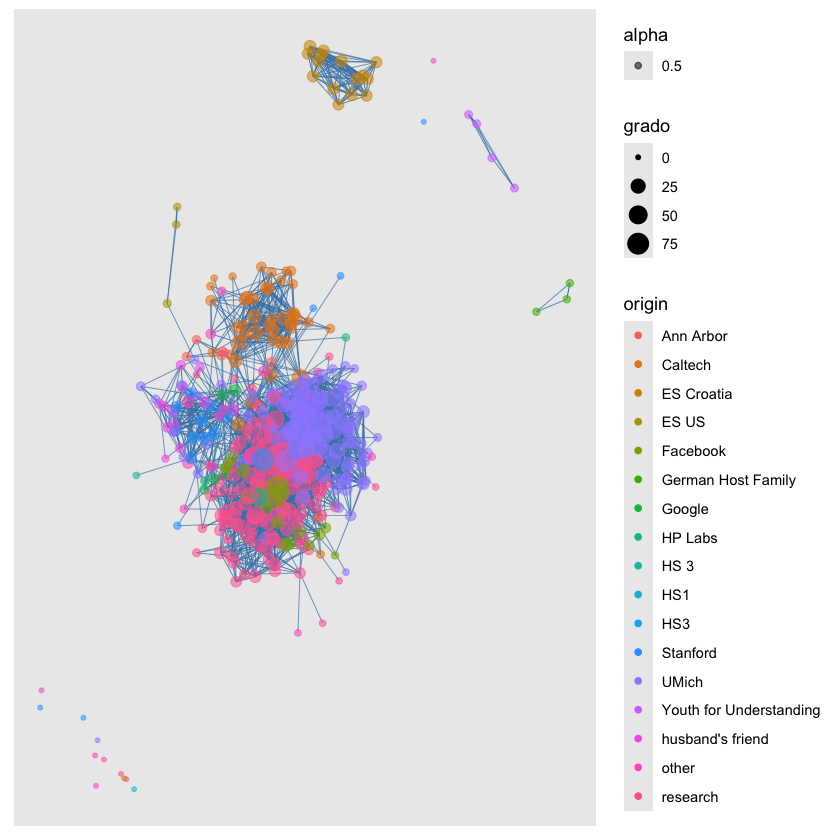

In [17]:
ggraph(g, layout = 'kk') +
  geom_edge_link(color = 'steelblue', width = 0.2) +
  geom_node_point(aes(size = grado, color = origin,alpha = 0.5))


---





---

**PREGUNTA 9.** ¿Cuál es el nodo con el mayor grado? ¿Cuál es ese grado?   (Ayuda: El máximo grado se obtiene con `max(degree(g))`


In [26]:
max(degree(g))

V(g)[degree(g) == max(degree(g))]


[1] 93

+ 1/388 vertex, named, from 6d7cb44:
[1] 23007

In [37]:
nodos[nodos$Id == 23007, ]

Id    Label   sex  agerank wallcount locale modularityclass origin
301 23007 Stanley male 345     5         en_US  1               UMich


---



Veamos la distribución de grados:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


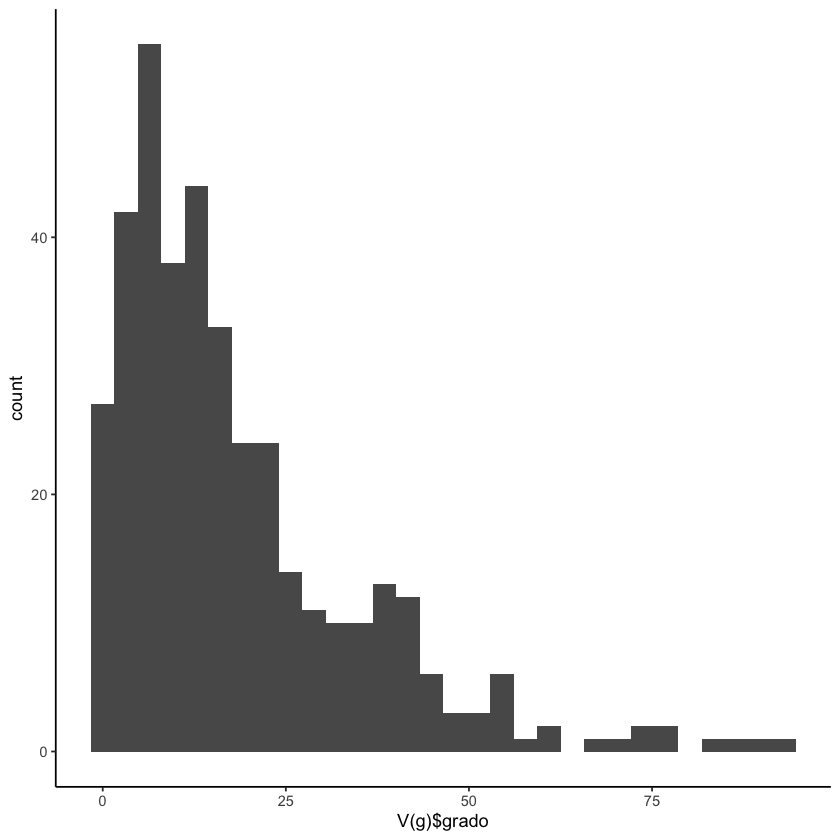

In [28]:
ggplot()+geom_histogram(aes(V(g)$grado))+theme_classic()



---

**PREGUNTA 10.** Compare esta distribución con la que obtuvo con Gephi.  También compare el grado medio

Si encuentra diferencias, ¿a qué cree que se deba?

igraph y Gephi pueden estar tratando el grafo de manera diferente en términos de si es dirigido o no dirigido. Pues en Gephi el grafo sí está siendo considerado como no dirigido, mientra que en igraph lo está considerando como dirigido. Sin embargo, lo que se tiene es que el promedio de grados es prácticamente el mismo.

In [40]:
mean(degree(g))

[1] 18.54639

Entonces más bien parece que el problema parece ser el tamaño del bin para el conteo del histograma que hace igraph. Pues en Gephi la distribución se grafica usando un gráfico de dispersión.


---



La intermediación (''betweenness'') de los nodos se calcula con la funcion `betweenness`.  

---

**PREGUNTA 11.** Calcule la intermediación del grafo y despliegue un histograma.
También despliegue un grafo en el que el tamaño del nodo es proporcional a su intermediación

¿Cuál es el nodo con la máxima intermediación?


In [52]:
betweenness_scores <- betweenness(g)

max_betweenness_id <- which.max(betweenness_scores)
print(paste("El nodo con la maxima intermediacion es:", names(betweenness_scores)[max_betweenness_id]))

# Crear un histograma de la intermediación con ggplot2
df_betweenness <- data.frame(intermediacion = betweenness_scores)

[1] "El nodo con la maxima intermediacion es: 23066"


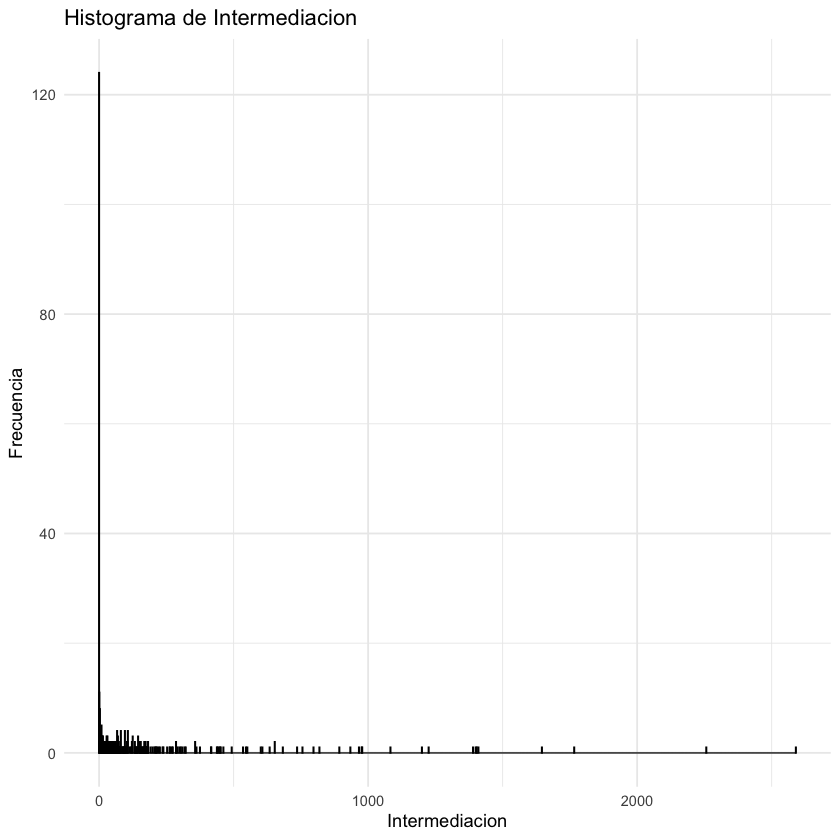

In [53]:

ggplot(df_betweenness, aes(x = intermediacion)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Histograma de Intermediacion", x = "Intermediacion", y = "Frecuencia")



----




Para no quedarnos con una idea pobre de ggraph, tomaremos los datasets `schoolNodes.csv` y `schoolEdges.csv` que tiene información anonimizada de una escuela danesa.

1. Lea los dos archivos y genere una gráfica con ellos.
2. Resaltemos el uso de alcohol en la escuela:



In [54]:
orillas <- read.csv("schoolEdges.csv",header=T)
nodos <- read.csv("schoolNodes.csv",header=T)
g <- graph_from_data_frame(d=orillas,v=nodos)

In [58]:
head(nodos)
head(orillas)

name delinquency alcohol_use sex age ethnicity religion
1 1     2          4           F   12  1          2      
2 2    NA          2           F   12  1          2      
3 3     2          1           F   12  2          3      
4 4     2          1           M   12  1          2      
5 5     1          1           M   12  1          2      
6 6     1          1           F   12  1         NA

from to type      
1 1     3 friendship
2 1    12 friendship
3 3     1 friendship
4 3     2 friendship
5 3     6 friendship
6 3     7 friendship



---

**PREGUNTA 12.** Muestre la gráfica resultante


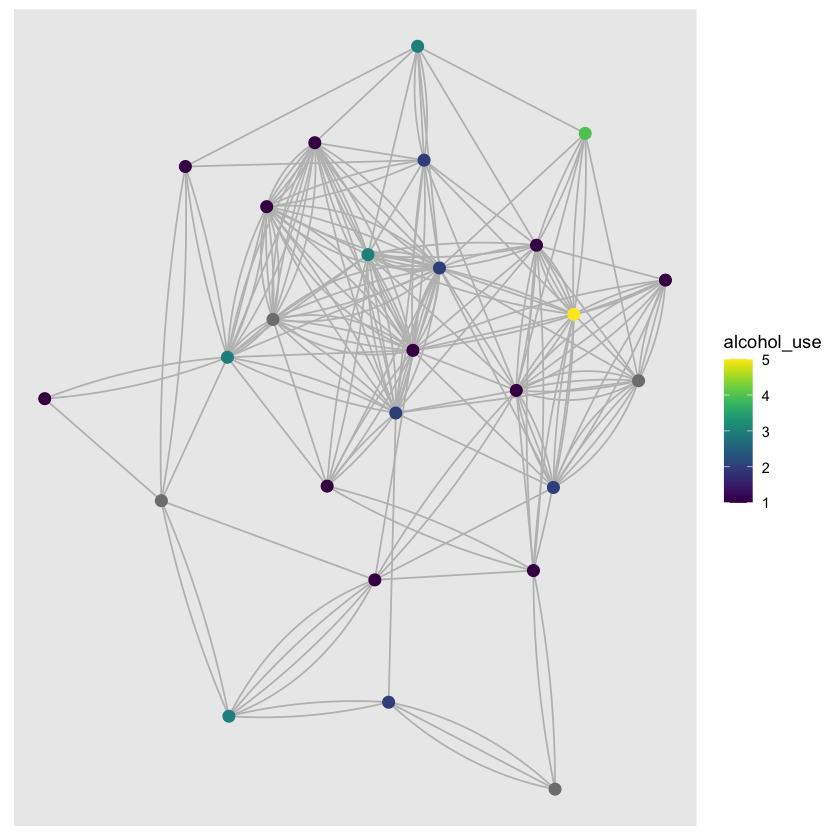

In [56]:
ggraph(g,layout = 'stress') +
  geom_edge_fan(width = .5, color = 'gray') +
  geom_node_point(aes(color=alcohol_use), size = 3) +
  scale_color_viridis()


---



Ahora ejecute el siguiente código:

Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."


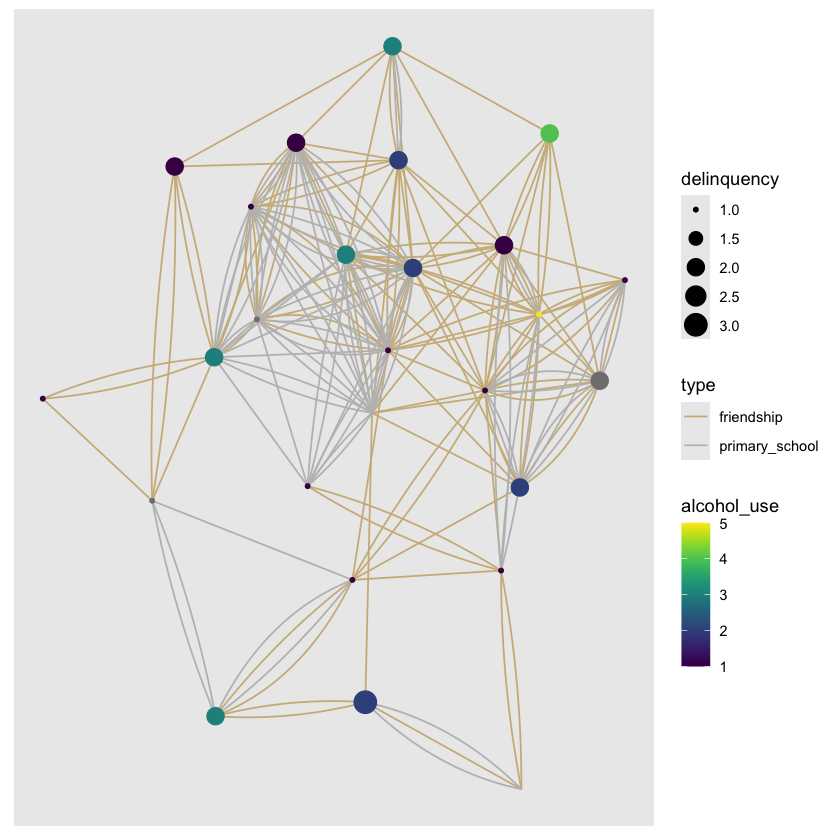

In [57]:
ggraph(g,layout = 'stress') +
  geom_edge_fan(aes(color=type), width = .5) +
  geom_node_point(aes(color=alcohol_use, size = delinquency)) +
  scale_color_viridis() +
  scale_edge_color_manual(values = c('friendship' = '#ceb888', 'primary_school' = 'gray'))



---

**PREGUNTA 13.** Explique muy brevemente qué hace el código y muestre la gráfica resultante.

¿Qué opinión le merece esta gráfica en cuanto a la claridad y eficiencia para comunicar información?


- `geom_edge_fan(aes(color=type), width = .5)`: Añade las aristas (orillas) al grafo con un ancho de 0.5 y colorea las aristas según el tipo de relación (ejemplo: 'friendship', 'primary_school'). El uso de geom_edge_fan ayuda a manejar mejor la sobreposición de aristas, dispersándolas alrededor de sus nodos de origen y destino para mejorar la claridad visual.

- `geom_node_point(aes(color=alcohol_use, size = delinquency))`: El color de los nodos depende de `alcohol_use` y su tamaño al nivel de `delinquency`

- `scale_color_viridis()`: Aplica la paleta de colores 'viridis'

- `scale_edge_color_manual(values = c('friendship' = '#ceb888', 'primary_school' = 'gray'))`: Define manualmente los colores de las aristas basados en el tipo de relación, proporcionando una distinción visual clara entre diferentes tipos de relaciones (en este caso, 'friendship' y 'primary_school', aunque 'primary_school' no parece estar presente en los datos mostrados).

Usar diferentes tamaños de nodos para representar el nivel de delincuencia y diferentes colores para el uso de alcohol permite entender rápidamente las características de los individuos dentro de la red. Además, el coloreado y la diferenciación de tipos de aristas facilitan la comprensión del diferente tipo de relaciones que existen. Sin embargo creo que hay aspectos a mejorar, pues los tamaños considero que son difíciles de interpretar, además de que considero que las líneas podrían verse mejor.




Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."


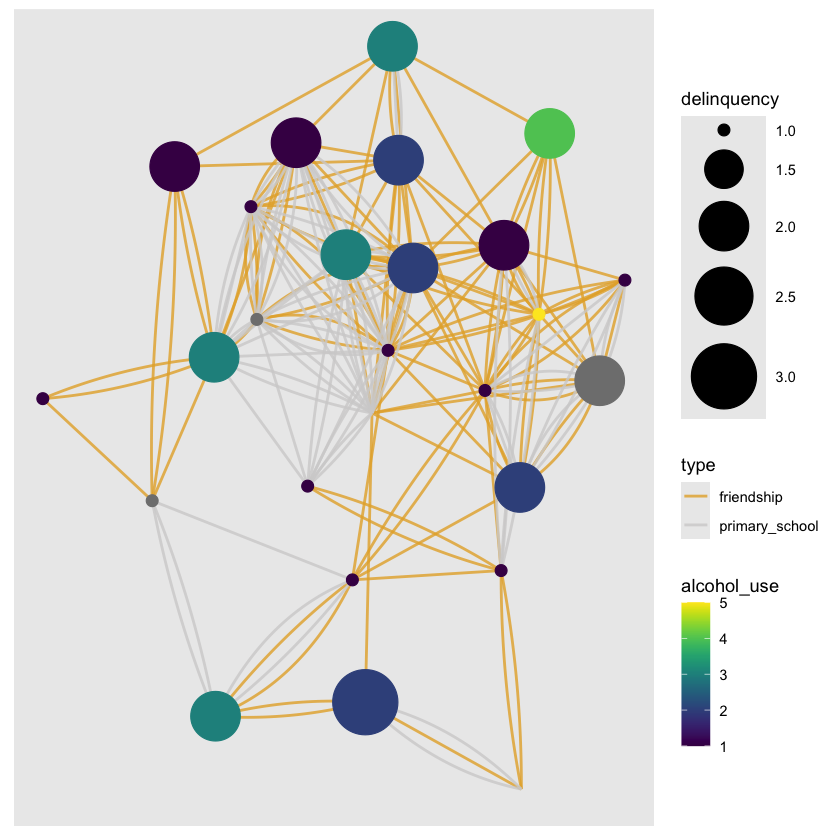

In [73]:
# Modificar el código original para ajustar el tamaño de los nodos
ggraph(g, layout = 'stress') +
  geom_edge_fan(aes(color = type), width = 0.8,alpha = 0.8) +
  geom_node_point(aes(color = alcohol_use, size = delinquency)) +
  scale_color_viridis() +
  scale_edge_color_manual(values = c('friendship' = '#e5ad33', 'primary_school' = '#d2d1d1')) +
  scale_size(range = c(3, 18)) # Ajusta el rango mínimo y máximo del tamaño de los nodos



---



## II. Visualizaciones de relaciones jerárquicas

Además de los grafos, ggraph ofrece diseños para desplegar redes de vínculos como árboles, mapas rectangulares y circulares. Estas visualizaciones pueden mostrar relaciones estrictamente jerárquicas, o de agrupamientos.



### Relaciones estrictamente jerárquicas

En el siguiente segmento de código se muestra el desplegado con un dendrograma de un organigrama de una institución.

In [ ]:
# Crea lista de orillas a partir de la estructura jerárquica
d1 <- data.frame(from="Vicerrector", to=c("Ante Salcedo", "Fer Esponda", "Francisco Perez"))
d2 <- data.frame(from=rep(d1$to, each=3), to=c("J. Guadalupe","Mónica","Enrique", "Octavio","Eva","Pepe","Ceci","Luis","Renata"))

orillas <-rbind(d1,d2)

# Crea el objeto
g <- graph_from_data_frame(orillas)

#... y lo desplegamos
ggraph(g,'dendrogram')+
  geom_edge_diagonal()+
  geom_node_point()+
  geom_node_text(aes( label=name)) +
  theme_void()



---

**PREGUNTA 14.** Muestre la gráfica resultante


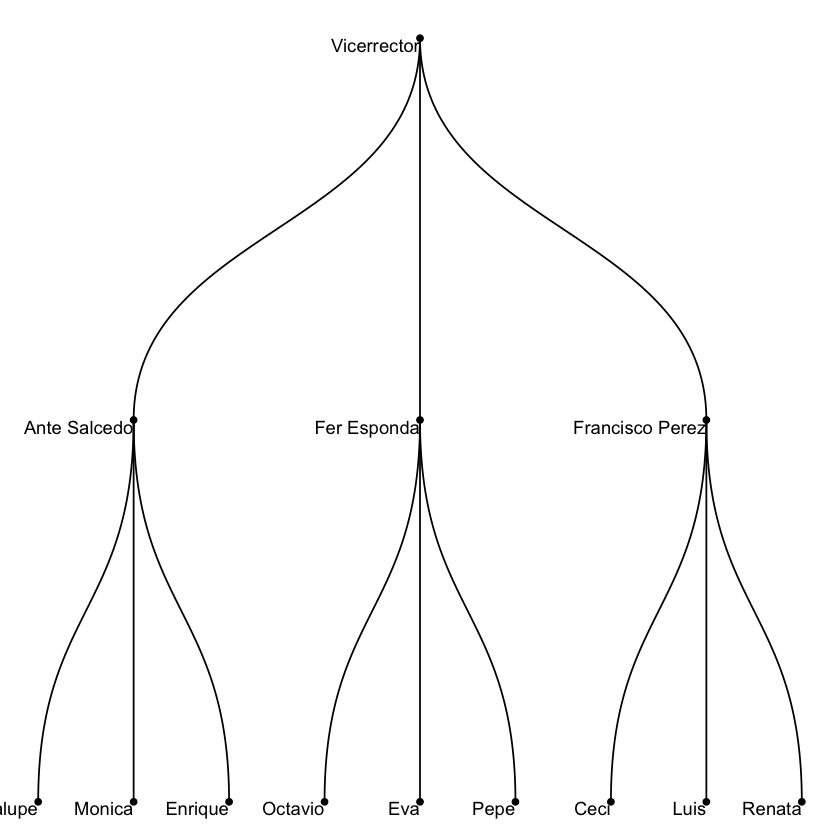

In [101]:
# Crea lista de orillas a partir de la estructura jerárquica
d1 <- data.frame(from="Vicerrector", to=c("Ante Salcedo", "Fer Esponda", "Francisco Perez"))
d2 <- data.frame(from=rep(d1$to, each=3), to=c("J. Guadalupe","Monica","Enrique", "Octavio","Eva","Pepe","Ceci","Luis","Renata"))

orillas <-rbind(d1,d2)

# Crea el objeto
g <- graph_from_data_frame(orillas)

#... y lo desplegamos
ggraph(g,'dendrogram')+
  geom_edge_diagonal()+
  geom_node_point()+
  geom_node_text(aes( label=name,hjust=1,vjust=1)) +
  theme_void()


---



Este es el código para hacer una gráfica circular:

In [ ]:
ggraph(g, layout = 'linear',circular=T) + 
  geom_node_point()+ 
  geom_node_text(aes( label=name)) + 
  geom_edge_arc()+ theme_void()

**PREGUNTA 15.** Muestre la gráfica resultante

---


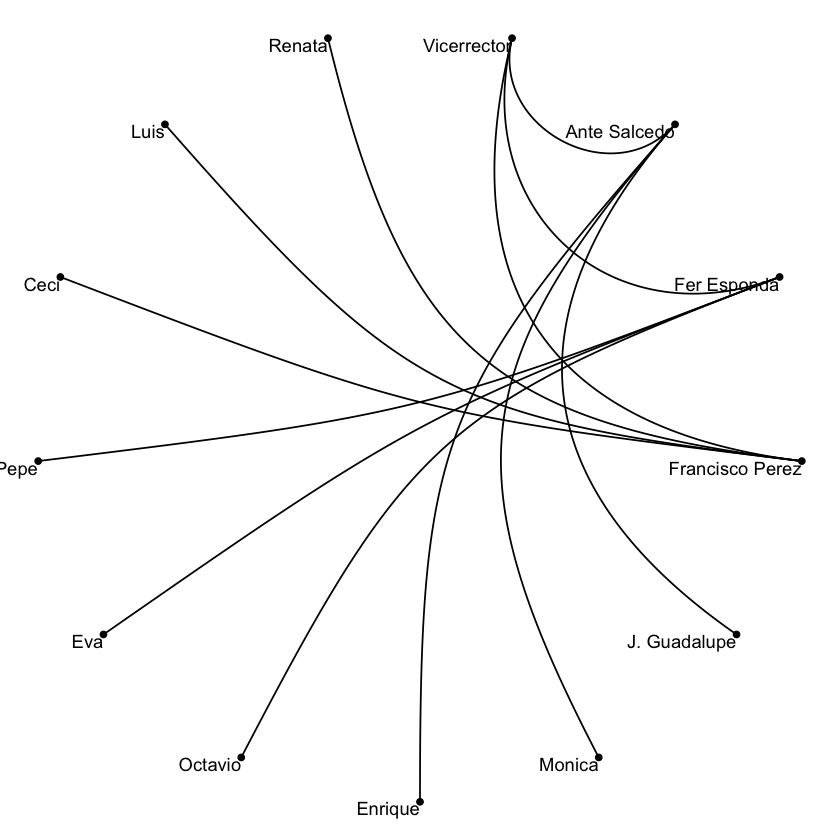

In [102]:
ggraph(g, layout = 'linear',circular=T) + 
  geom_node_point()+ 
  geom_node_text(aes( label=name,hjust=1,vjust=1)) + 
  geom_edge_arc()+ theme_void()


---

**PREGUNTA 16.** Muestre la gráfica resultante al añadir al código de dendrograma, el parámetro `circular=TRUE`.


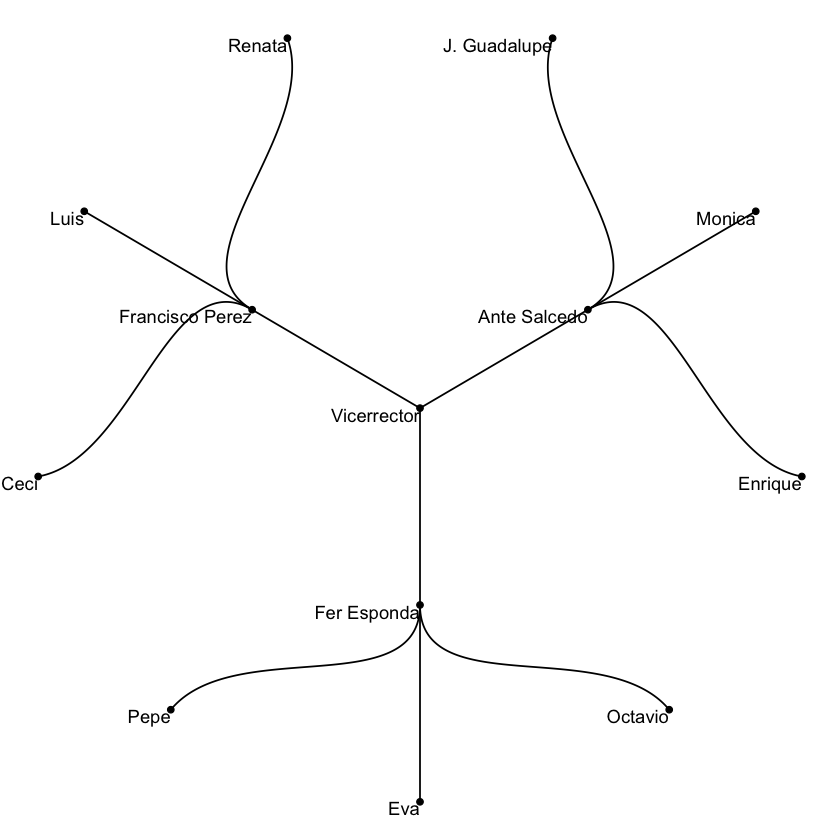

In [100]:
ggraph(g,'dendrogram',circular = TRUE)+
  geom_edge_diagonal()+
  geom_node_point()+
  #Move the text from the center of the node to the side
  geom_node_text(aes( label=name),hjust=1,vjust=1) +
  theme_void()


---



.... y éste, el código para una gráfica icicle:

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


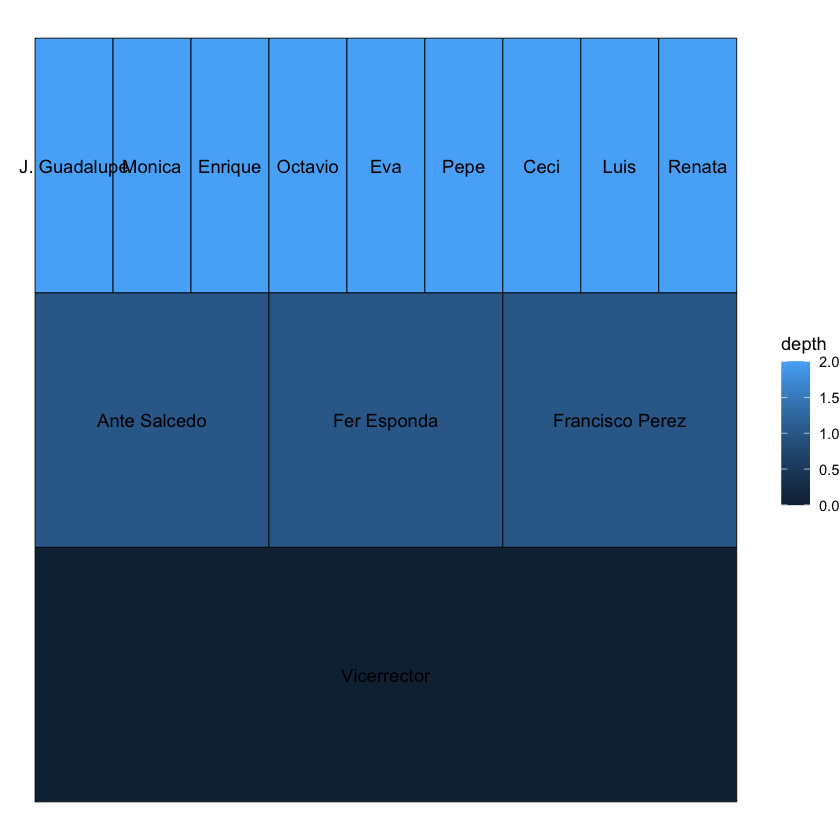

In [83]:
ggraph(g,'partition')+
  geom_node_tile(aes(fill=depth), size=0.25) +
  geom_node_text(aes( label=name)) +
  theme_void()



---

**PREGUNTA 17.** Modifique el código para que la gráfica aparezca un poco más elegante.

Muestre la gráfica resultante


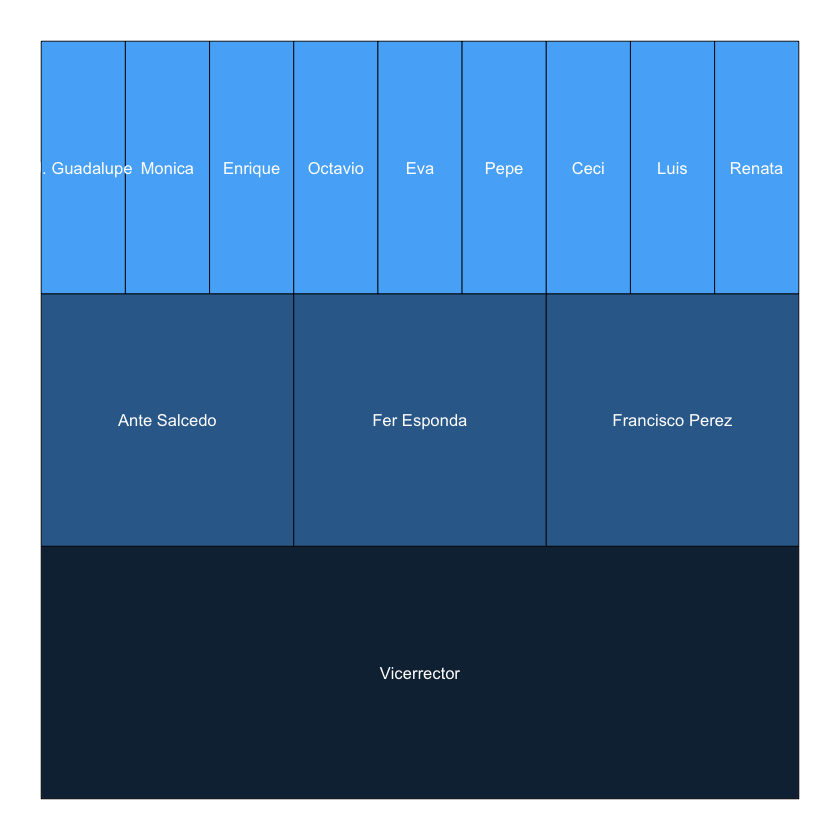

In [88]:
ggraph(g, 'partition') +
    geom_node_tile(aes(fill=depth), size=0.25) +
    geom_node_text(aes(label=name), size=3.5, color="white") + 
    theme_void() +
    theme(
        legend.position = "none",      
        plot.title = element_text(hjust = 0.5), 
        plot.margin = margin(2, 2, 2, 2)  
    )


---



---

**PREGUNTA 18.** Haga una gráfica de árbol, circular y icicle donde aparezcan dos países de América Central, cada uno con tres Estados y cada Estado con tres Municipios.


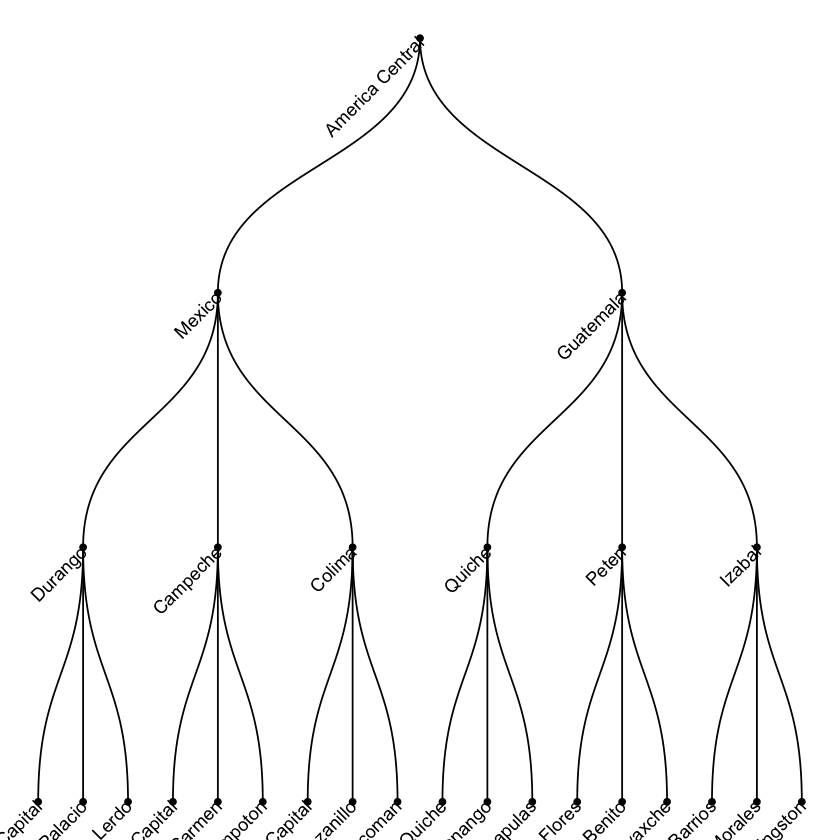

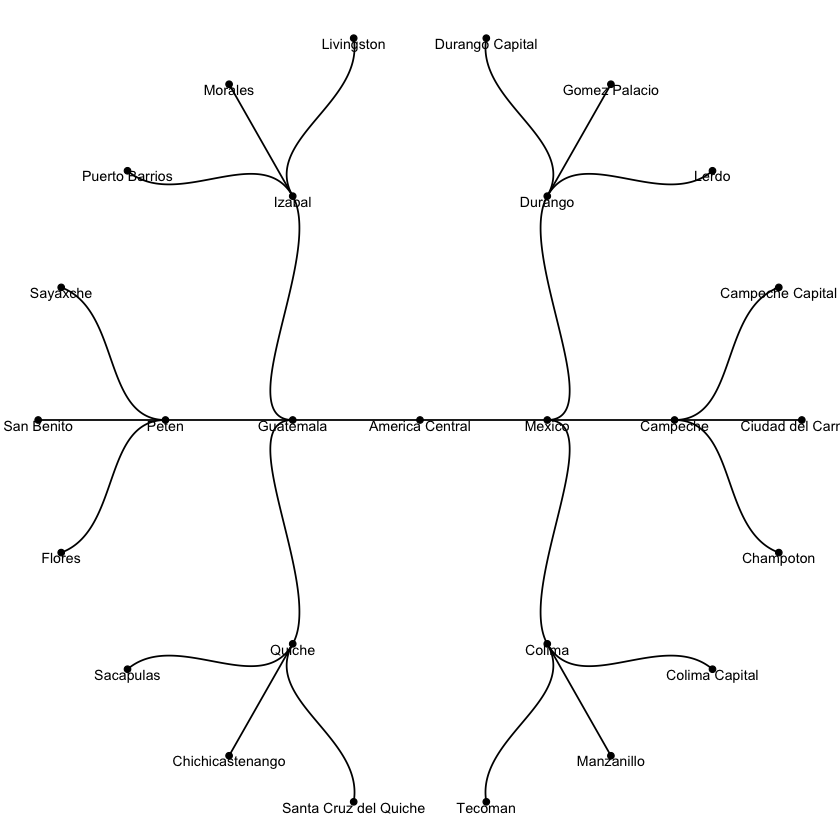

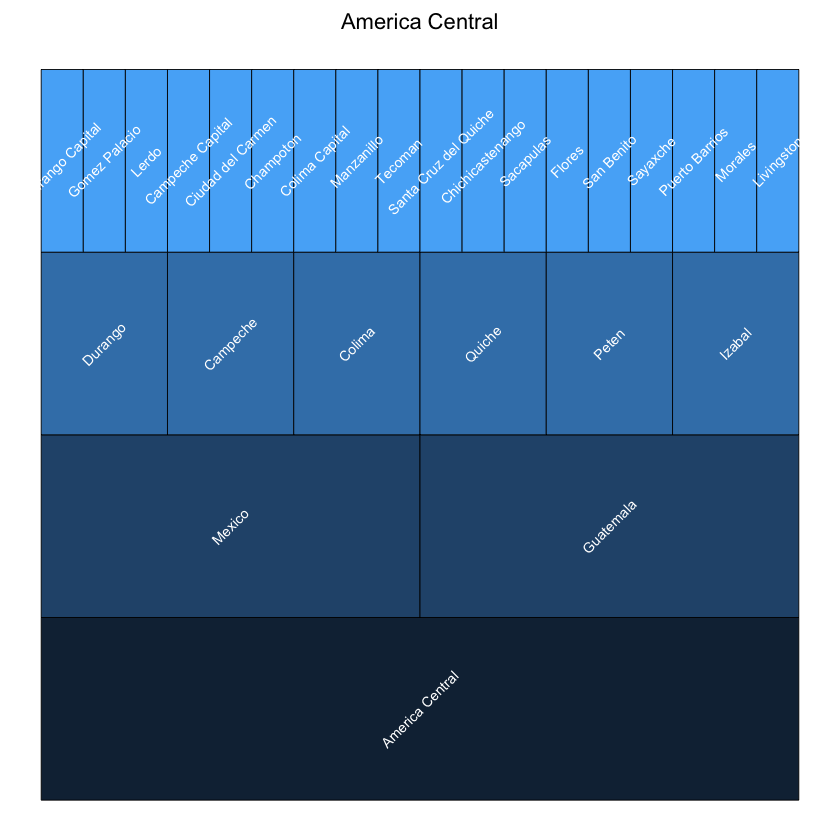

In [121]:
# Carga de librerías necesarias
library(igraph)
library(ggraph)

# Data frame inicial de países a estados
d1 <- data.frame(from="America Central", to=c("Mexico", "Guatemala")) 
d2 <- data.frame(from=rep(d1$to, each=3), to=c("Durango","Campeche","Colima", "Quiche","Peten","Izabal")) 

# Data frame de estados a municipios
d3 <- data.frame(from=rep(c("Durango", "Campeche", "Colima", "Quiche", "Peten", "Izabal"), each=3), 
                 to=c("Durango Capital", "Gomez Palacio", "Lerdo", 
                      "Campeche Capital", "Ciudad del Carmen", "Champoton", 
                      "Colima Capital", "Manzanillo", "Tecoman", 
                      "Santa Cruz del Quiche", "Chichicastenango", "Sacapulas", 
                      "Flores", "San Benito", "Sayaxche", 
                      "Puerto Barrios", "Morales", "Livingston"))

# Combinar todos los data frames en uno
orillas_completo <- rbind(d1, d2, d3)

# Crear el objeto de grafo
g <- graph_from_data_frame(orillas_completo)

# Gráfica de árbol
ggraph(g, 'dendrogram') + 
  geom_edge_diagonal() + 
  geom_node_point() + 
  geom_node_text(aes(label=name, hjust=1, vjust=0.6,angle=45)) + 
  theme_void()

# Gráfica circular
ggraph(g, 'dendrogram', circular=TRUE) + 
  geom_edge_diagonal() + 
  geom_node_point() + 
  geom_node_text(aes(label=name, vjust=1), size=3) + 
  theme_void()

# Gráfica icicle
ggraph(g, 'partition') +
  geom_node_tile(aes(fill=depth), size=0.25) +
  geom_node_text(aes(label=name), size=3, color="white",angle=45,) +
  theme_void() +
  labs(title = "America Central") +
  theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(2, 2, 2, 2))



---



#### Agrupamientos

R cuenta con un amplio repertorio de librerías para desplegar visualizaciones relacionadas con agrupamientos (y mostrar las partes de un todo) jerárquicos.

---

**PREGUNTA 19.** Muestre las gráficas de contención de las notas, en las que se despliegan GDP y HDI para los países que integran el G20.  Despliegue únicamente el GDP (en proporción del área) y utilice la tonalidad para distinguir entre regiones


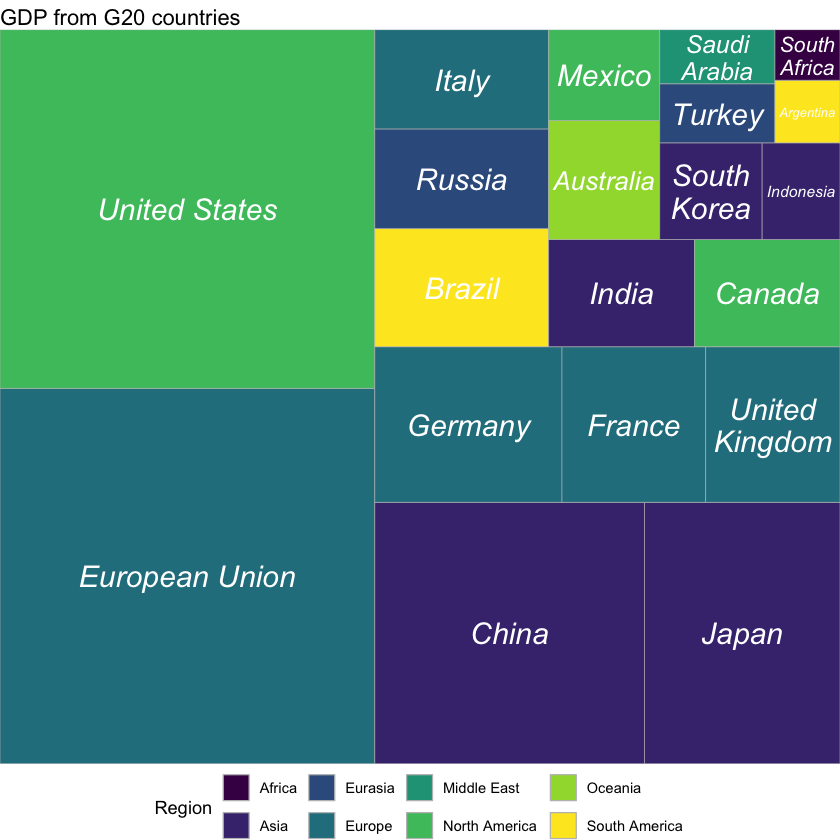

In [131]:
datos <- G20

ggplot(datos, aes(area = gdp_mil_usd, fill = region, label = country)) +
  geom_treemap() +
  geom_treemap_text(fontface = "italic", colour = "white", place = "centre", reflow = TRUE) +
  scale_fill_viridis_d() +  # Use the viridis color palette
  labs(title = "GDP from G20 countries",
       fill = "Region") +
  theme_void() +
  theme(legend.position = "bottom")


---

El archivo `VentasHibridos.csv` contiene las ventas de vehículos híbridos en la República Mexicana en 2021 y un mapa de árbol de las ventas es el siguiente:


![](https://drive.google.com/uc?export=view&id=19HWbNMMWCTE8esJr-hZeBelsprfo3djl)


---

**PREGUNTA 20.** Haga lo necesario para crear un mapa de árbol como el anterior.  Tome en cuenta que:

* Utilice una paleta de colores con tonalidades verdes (estamos hablando de autos híbridos). Ayuda: Considere la función `scale_fill_distiller()`
* Los números en la columna de ventas, tienen comas para separar los miles, por lo que tendrá que hacer una pequeña manipulación de los datos antes de graficar


In [7]:
library(treemapify)
library(ggplot2)

datos <- read.csv("VentasHibridos.csv")
datos$VENTAS <- as.numeric(gsub(",", "", datos$VENTAS))


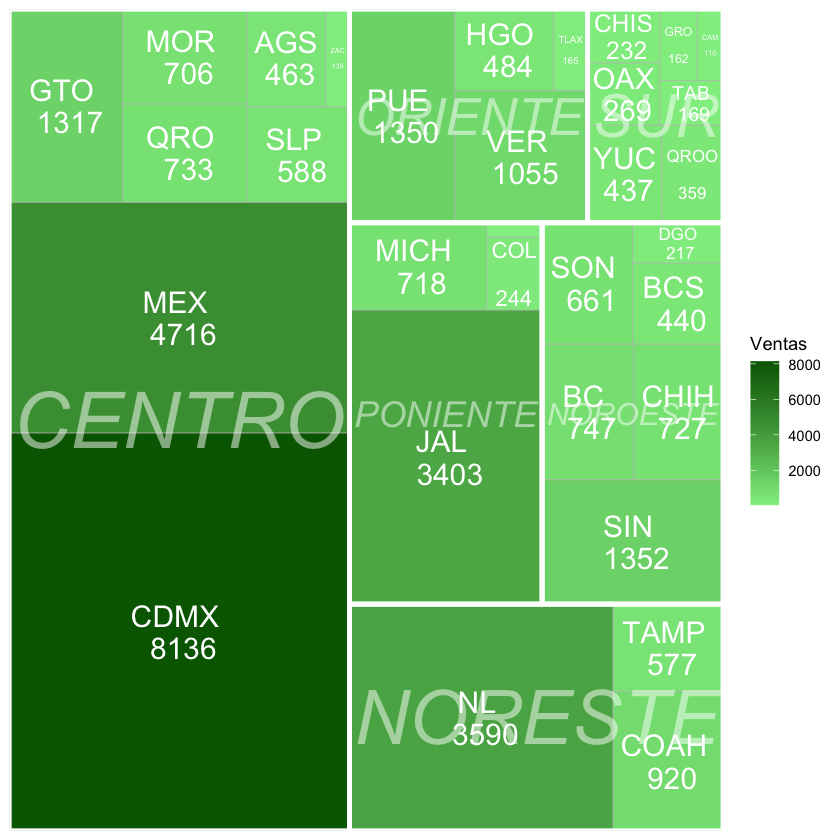

In [9]:

ggplot(datos, aes(area = VENTAS, fill = VENTAS, label = NOM_ABR, subgroup = REGI.N)) +
  geom_treemap() +
  geom_treemap_subgroup_border(color = "white") +
  geom_treemap_subgroup_text(place = "center", grow = TRUE, alpha = 0.5, color = "white", fontface = "italic", min.size = 0) +
  geom_treemap_text(aes(label = paste(NOM_ABR, "\n", VENTAS)), place = "center", color = "white", reflow = TRUE) +
  scale_fill_gradient(low = "lightgreen", high = "darkgreen") +  # Utiliza una paleta verde
  labs(fill = "Ventas")


---

